# Understanding Descriptive Statistics

Import the necessary libraries here:

In [3]:
# Libraries
import random
import pandas as pd
import numpy as np
from scipy.stats import trim_mean   # conda install scipy
from statsmodels import robust      # conda install -c conda-forge statsmodels 
import wquantiles                   # pip install wquantiles

import seaborn as sns
import matplotlib.pylab as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [4]:
# your code here

def dice(times=10):
    rolls = [random.randint(1, 6) for i in range(times)]
    df = pd.DataFrame({'Rolls': rolls})
    return df

In [5]:
result = dice()
print(result)

   Rolls
0      5
1      5
2      6
3      1
4      5
5      4
6      6
7      1
8      3
9      6


#### 2.- Plot the results sorted by value.

   Rolls
3      1
7      1
8      3
5      4
0      5
1      5
4      5
2      6
6      6
9      6
<class 'pandas.core.frame.DataFrame'>


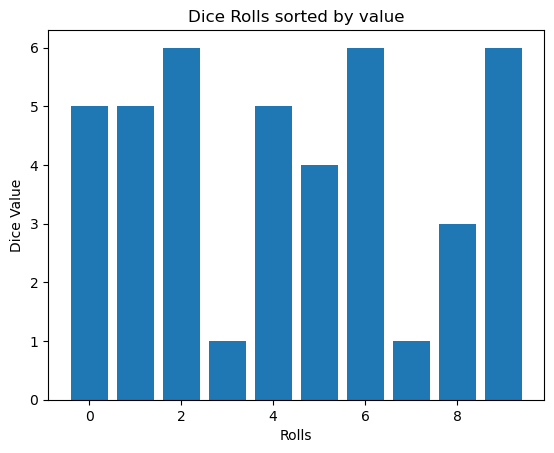

In [19]:
# your code here

sorted_result = result.sort_values(by='Rolls')
print(sorted_result)

plt.bar(sorted_result.index, sorted_result['Rolls'])
plt.xlabel('Rolls')
plt.ylabel('Dice Value')
plt.title('Dice Rolls sorted by value')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

5    3
6    3
1    2
4    1
3    1
Name: Rolls, dtype: int64


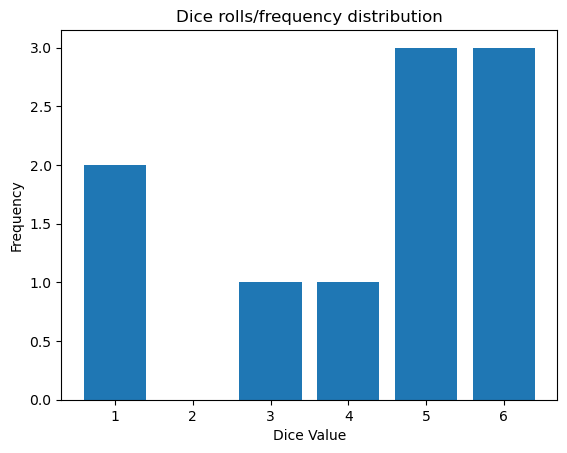

In [18]:
# your code here
# Distribuicón de frecuenca = cuenta cuántos registros existen para el dataframe. 

frecuencia = result['Rolls'].value_counts()
print(frecuencia)

plt.bar(frecuencia.index, frecuencia.values)
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Dice rolls/frequency distribution')
plt.show()

In [ ]:
"""
your comments here

- El primer plot muestra la relación entre las vueltas que el dado da (eje x) y los resultados por cada vuelta (eje y).
- El segundo plot muestra la relación de las frecuencias (eje y) por cada valor que muestra el dado (eje x). 

En el primer plot puedes observar una tendencias: 
- Cada tres tiradas suele ofrecer el valor más bajo 

En el segundo plot puedes observar que, al contrario de lo que se podía pensar, lo más frecuente 
son valores altos en el dado. 
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [28]:
# your code here
def calculate_mean(df): 
    suma = sum(sorted_result['Rolls'])
    div = suma/len(sorted_result)
    return div

calculate_mean(sorted_result)   # 4.2

'''Comprobando:
mean = sorted_result['Rolls'].mean()
print(mean)                    # 4.2
'''

"Comprobando:\nmean = sorted_result['Rolls'].mean()\nprint(mean)\n"

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [42]:
# your code here

print(frecuencia)  # Aquí tenía ya la distribución de frecuencias

porcentual = result['Rolls'].value_counts(normalize=True)*100 # Genera el porcentaje
print(porcentual)

# Calculate the mean using the values of the frequency distribution

total_observations = frecuencia.sum()
mean_value = (frecuencia.index * frecuencia).sum() / total_observations
print(mean_value)
      

5    3
6    3
1    2
4    1
3    1
Name: Rolls, dtype: int64
5    30.0
6    30.0
1    20.0
4    10.0
3    10.0
Name: Rolls, dtype: float64
4.2


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [ ]:
# your code here

def calculate_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)

    if n % 2 == 1:
        # If the number of observations is odd, return the middle value
        median_value = sorted_data[n // 2]
    else:
        # If the number of observations is even, return the average of the two middle values
        middle1 = sorted_data[(n // 2) - 1]
        middle2 = sorted_data[n // 2]
        median_value = (middle1 + middle2) / 2

    return median_value

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [ ]:
# your code here
def calculate_quartiles(data):
    sorted_data = sorted(data)
    n = len(sorted_data)

    q2 = calculate_median(sorted_data)

    if n % 2 == 1:
        # If the number of observations is odd, split the data into lower and upper halves
        lower_half = sorted_data[:n // 2]
        upper_half = sorted_data[(n // 2) + 1:]
    else:
        # If the number of observations is even, split the data into lower and upper halves
        lower_half = sorted_data[:n // 2]
        upper_half = sorted_data[n // 2:]

    q1 = calculate_median(lower_half)
    q3 = calculate_median(upper_half)

    return q1, q2, q3

In [ ]:
# https://www.youtube.com/watch?app=desktop&v=dmrsX9PeZBk&ab_channel=ElProfeAlejo 

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [ ]:
# your code here

#### 3.- Now, calculate the frequency distribution.


In [ ]:
# your code here

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [ ]:
# your code here

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [ ]:
# your code here

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""